
### Deskripsi Data

1.   age: Usia pasien dalam tahun
2.   sex: Jenis kelamin pasien (0 = Perempuan & 1 = Laki-laki)
3.   cp: Menggambarkan jenis/tipe nyeri dada yang dirasakan oleh pasien (nlai 0-3)
4.   trestbps: Tekanan darah pasien dalam keadaan istirahat (dalam mmHg).
5.   chol: Tingkat kolesterol serum pasien dalam miligram per desiliter (mg/dL)
6.   fbs: Kadar gula darah puasa pasien <= 120mg/dL (0) atau >= 120 mg/dL (1)
7.   restecg: Hasil Elektrokardiogram dalam Keadaan Istirahat (nilai 0-2)
8.   thalach: Detak jantung maksimum yang dicapai oleh pasien
9.   exang: Apakah pasien mengalami angina yang dipicu oleh latihan (0 = Tidak & 1 = Ya)
10.  oldpeak: Depresi segmen ST jantung setelah latihan relatif terhadap istirahat
11.  slope: Kemiringan puncak segmen ST selama latihan (nilai 0-2)
12.  ca: Jumlah pembuluh darah utama yang tercatat dengan fluroscopy, berkisar dari 0 hingga 3
10.  thal: Jenis defek jantung yang diamati yaitu 0 (normal), 1 (defek tetap), dan 2 (defek yang dapat dipulihkan)
11.  target: status diagnosis penyakit jantung pasien (0 = tidak ada penyakit jantung & 1 = ada penyakit jantung)


> Dalam kasus ini kolom target merupakan variabel dependen

In [1]:
# Import Package
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Package untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#Machine learning Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier

#Cross Validation -> Untuk menangani data yang tidak balance
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import learning_curve

#Evaluation
from sklearn import metrics
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer,accuracy_score,roc_auc_score,precision_score,recall_score,f1_score,log_loss
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold, GridSearchCV

from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.tree import DecisionTreeClassifier

In [2]:
#load Data
data = pd.read_csv("C:/Users/AVITA/Downloads/Data Science Track SC/heart.csv")

In [3]:
#Menampilkan 5 baris data teratas
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
#Menampilkan 5 baris data terakhir
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


# Exploratory Data Analysis

In [5]:
#Melihat informasi data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
#Melihat ukruran data (Total baris dan kolom)
data.shape

(1025, 14)

Terdapat 1025 baris dan 4 kolom pada dataset

In [7]:
# melihat statistik data 
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


In [8]:
#Cek nama atribut
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [9]:
#Mengubah nama kolom agar mudah dipahami
data.columns=['Age', 'Sex', 'Chest Pain Type', 'Resting Blood Pressure', 'Serum Cholestoral', 'Fasting Blood Sugar', 'Resting Electrocardiographic Results', 'Maximum Heart Rate Achieved', 'Exercise Induced Angina', 'Oldpeak', 'Slope', 'Number of Major Vessels', 'Thalassemia', 'Target']
data

,Age,Sex,Chest Pain Type,Resting Blood Pressure,Serum Cholestoral,Fasting Blood Sugar,Resting Electrocardiographic Results,Maximum Heart Rate Achieved,Exercise Induced Angina,Oldpeak,Slope,Number of Major Vessels,Thalassemia,Target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [10]:
#Cek value pada kolom target/class
data['Target'].value_counts()

1    526
0    499
Name: Target, dtype: int64

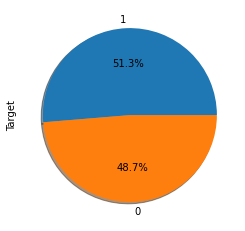

In [11]:
#Melihat perbandingan kolom target
data['Target'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
plt.show()

Terlihat pada pie chart diatas bahwa kelas pada dataset cukup seimbang. Dimana terdapat 526 data yang memiliki penyakit jantung dan 499 data yang tidak memiliki penyakit jantung. 

#### Analisis Univariat

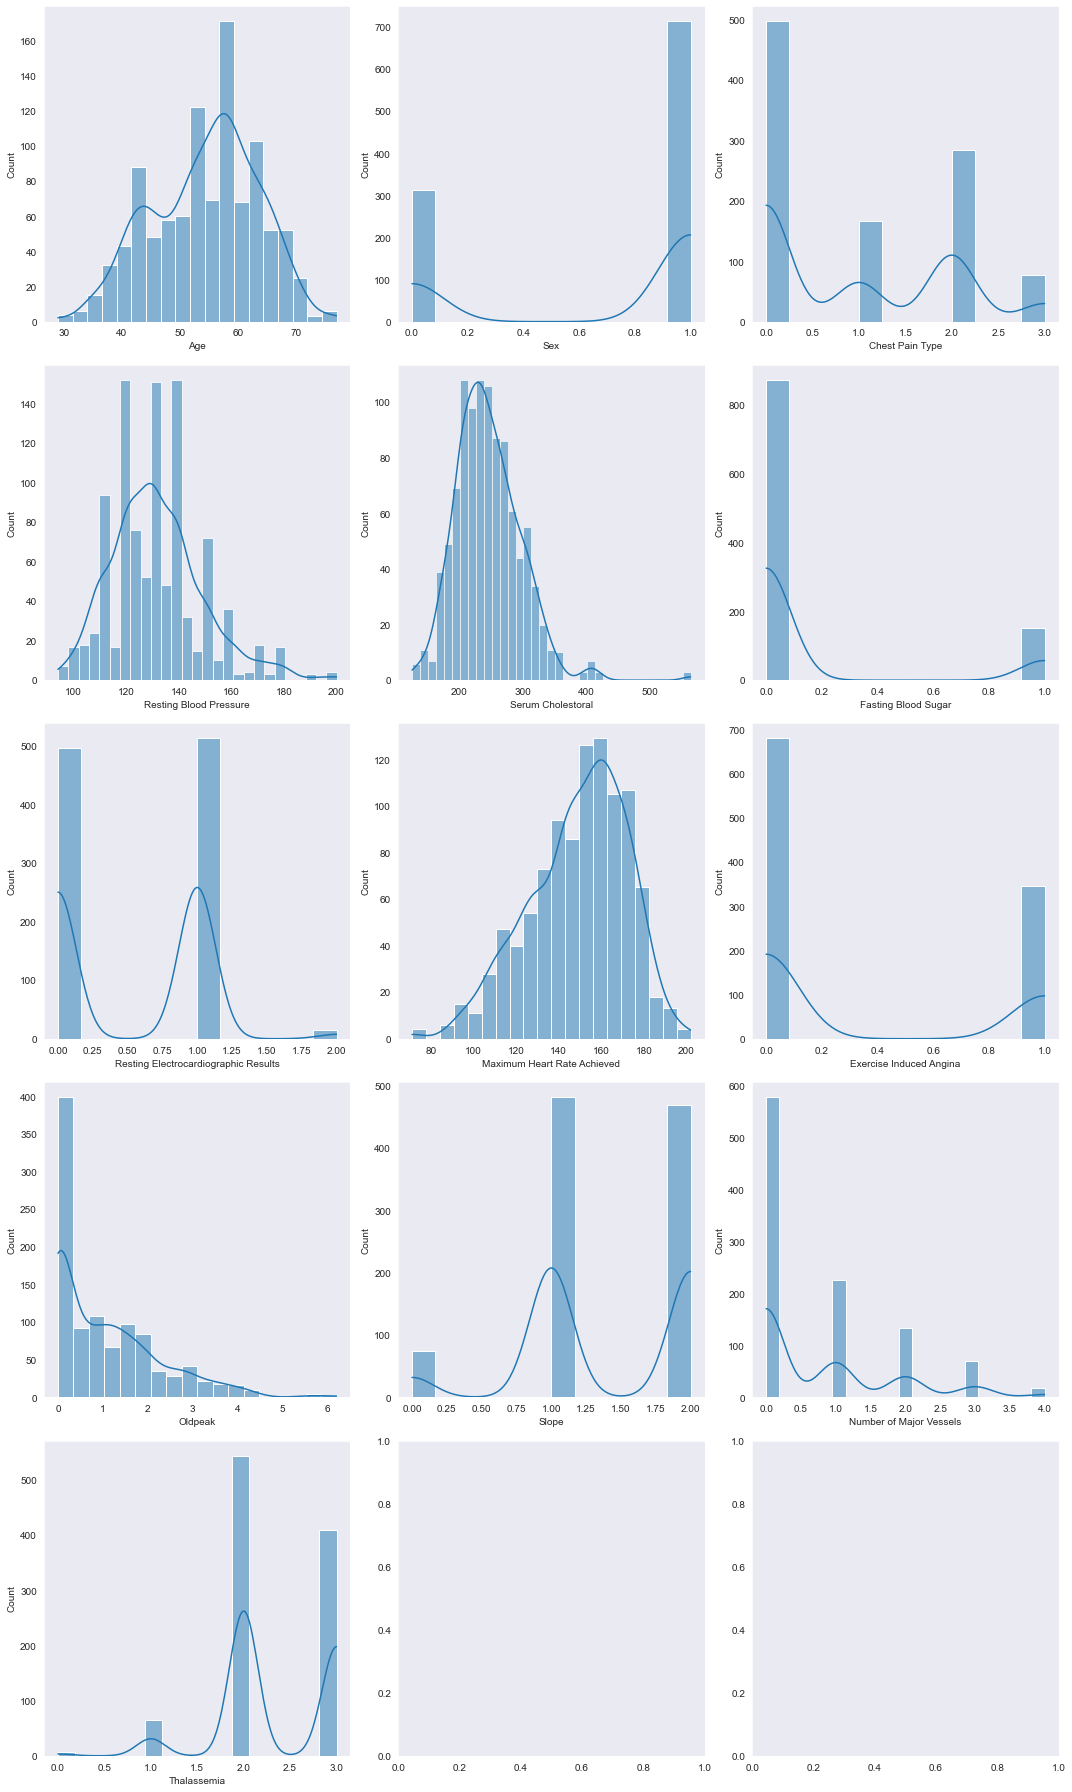

In [12]:
sns.set_style('dark')

fig, ax = plt.subplots(5, 3, figsize=(15, 25))

sns.histplot(ax=ax[0, 0], data=data, x='Age', kde=True)
sns.histplot(ax=ax[0, 1], data=data, x='Sex', kde=True)
sns.histplot(ax=ax[0, 2], data=data, x='Chest Pain Type', kde=True)
sns.histplot(ax=ax[1, 0], data=data, x='Resting Blood Pressure', kde=True)
sns.histplot(ax=ax[1, 1], data=data, x='Serum Cholestoral', kde=True)
sns.histplot(ax=ax[1, 2], data=data, x='Fasting Blood Sugar', kde=True)
sns.histplot(ax=ax[2, 0], data=data, x='Resting Electrocardiographic Results', kde=True)
sns.histplot(ax=ax[2, 1], data=data, x='Maximum Heart Rate Achieved', kde=True)
sns.histplot(ax=ax[2, 2], data=data, x='Exercise Induced Angina', kde=True)
sns.histplot(ax=ax[3, 0], data=data, x='Oldpeak', kde=True)
sns.histplot(ax=ax[3, 1], data=data, x='Slope', kde=True)
sns.histplot(ax=ax[3, 2], data=data, x='Number of Major Vessels', kde=True)
sns.histplot(ax=ax[4, 0], data=data, x='Thalassemia', kde=True)

plt.tight_layout()
plt.show()

#### Analisis Bivariat

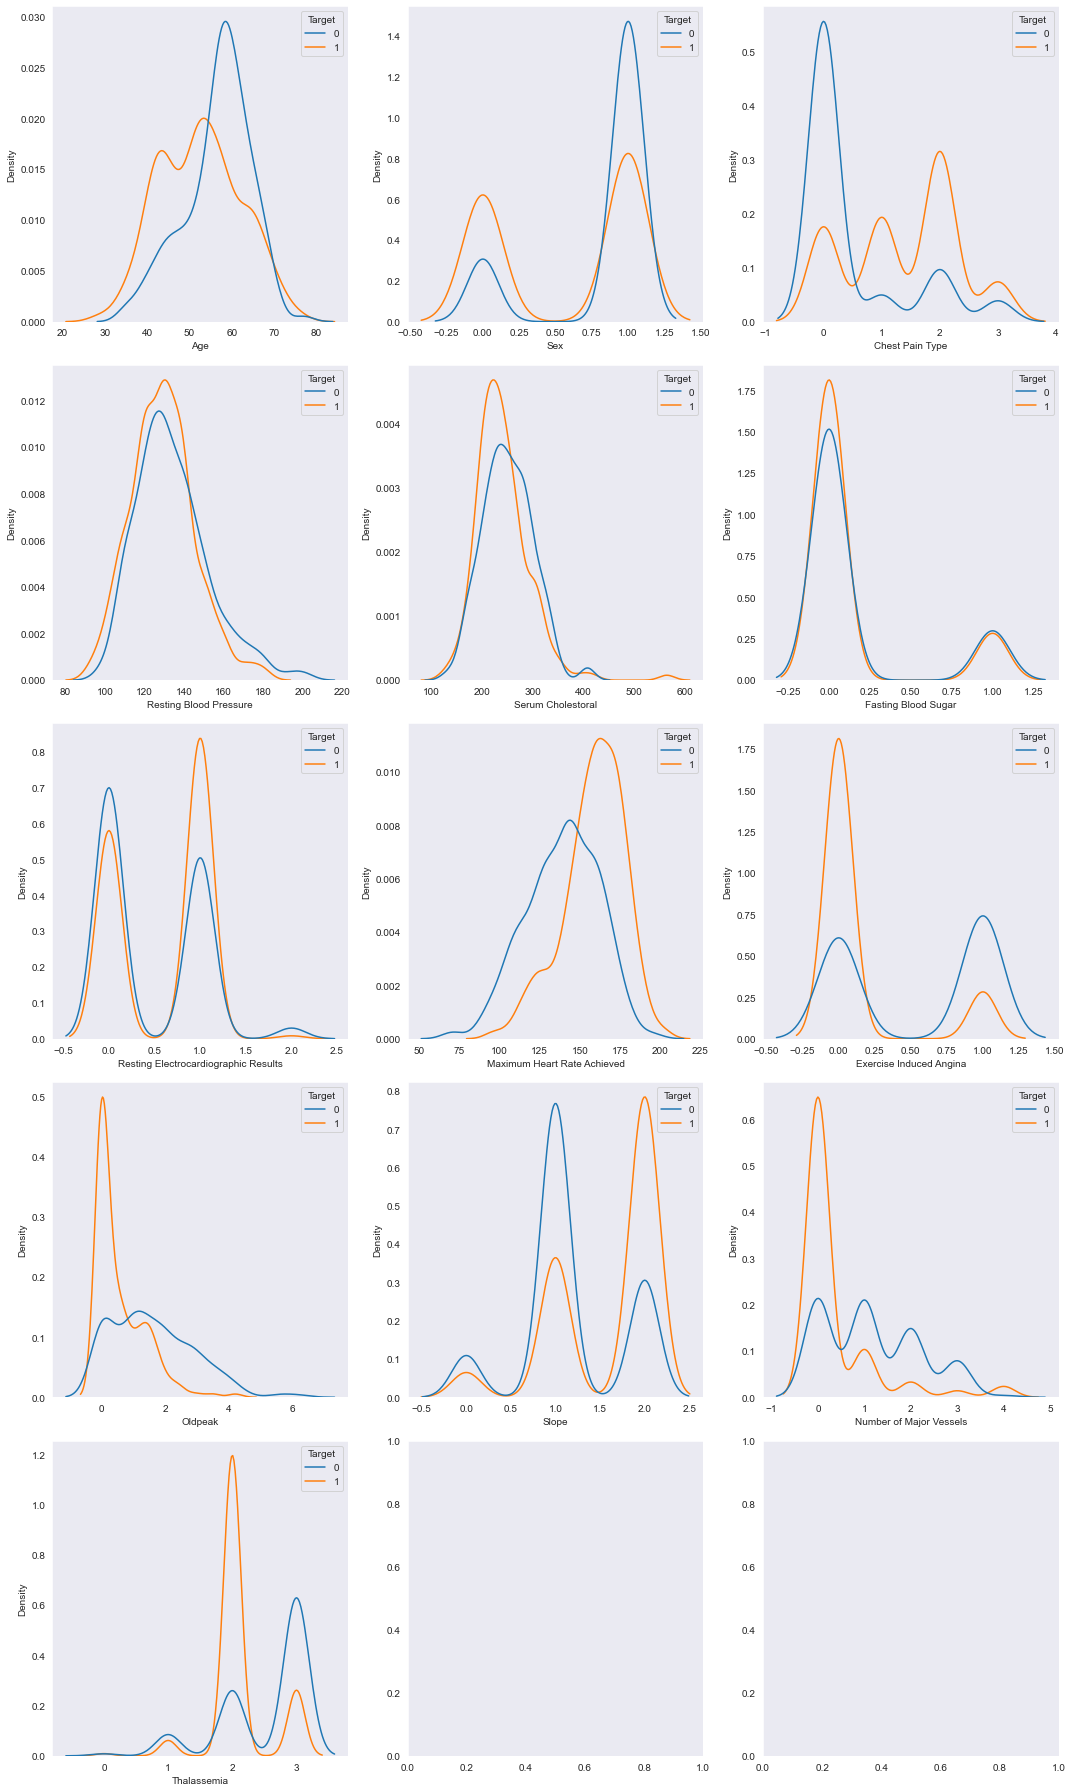

In [13]:
sns.set_style('dark')

fig, ax = plt.subplots(5, 3, figsize=(15, 25))

sns.kdeplot(ax=ax[0, 0], data=data, x='Age', hue="Target")
sns.kdeplot(ax=ax[0, 1], data=data, x="Sex", hue="Target")
sns.kdeplot(ax=ax[0, 2], data=data, x='Chest Pain Type', hue="Target")
sns.kdeplot(ax=ax[1, 0], data=data, x='Resting Blood Pressure', hue="Target")
sns.kdeplot(ax=ax[1, 1], data=data, x='Serum Cholestoral', hue="Target")
sns.kdeplot(ax=ax[1, 2], data=data, x='Fasting Blood Sugar', hue="Target")
sns.kdeplot(ax=ax[2, 0], data=data, x='Resting Electrocardiographic Results', hue="Target")
sns.kdeplot(ax=ax[2, 1], data=data, x='Maximum Heart Rate Achieved', hue="Target")
sns.kdeplot(ax=ax[2, 2], data=data, x='Exercise Induced Angina', hue="Target")
sns.kdeplot(ax=ax[3, 0], data=data, x='Oldpeak', hue="Target")
sns.kdeplot(ax=ax[3, 1], data=data, x='Slope', hue="Target")
sns.kdeplot(ax=ax[3, 2], data=data, x='Number of Major Vessels', hue="Target")
sns.kdeplot(ax=ax[4, 0], data=data, x='Thalassemia', hue="Target")

plt.tight_layout()
plt.show()

#### Analisis Multivariat

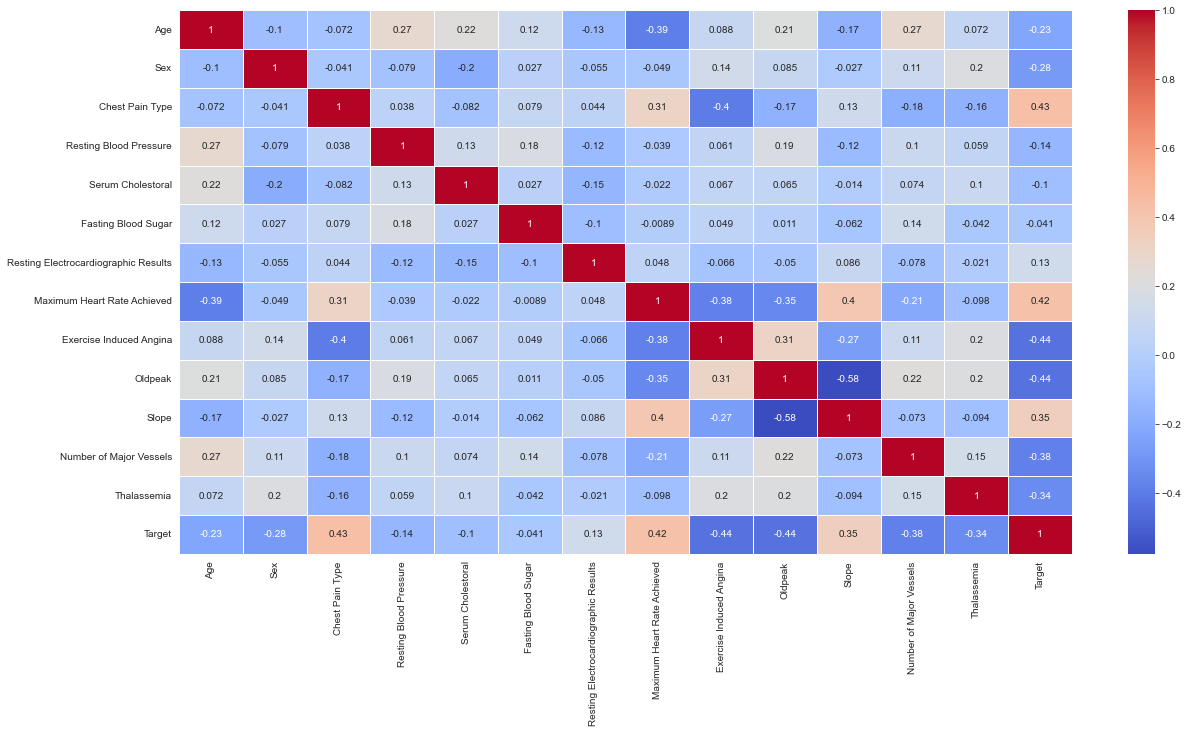

In [14]:
sns.heatmap(data.corr(),linewidths=.5,annot=True,cmap='coolwarm')
fig=plt.gcf()
fig.set_size_inches(20,10)
plt.show()

In [15]:
# Cek Urutan korelasi 
korelasi = data.corr()["Target"].sort_values()
korelasi

Oldpeak                                -0.438441
Exercise Induced Angina                -0.438029
Number of Major Vessels                -0.382085
Thalassemia                            -0.337838
Sex                                    -0.279501
Age                                    -0.229324
Resting Blood Pressure                 -0.138772
Serum Cholestoral                      -0.099966
Fasting Blood Sugar                    -0.041164
Resting Electrocardiographic Results    0.134468
Slope                                   0.345512
Maximum Heart Rate Achieved             0.422895
Chest Pain Type                         0.434854
Target                                  1.000000
Name: Target, dtype: float64

Nilai positif menandakan bahwa variabel tersebut berkorelasi postif dengan variabel target dimana semakin tinggi variabel tersebut maka akan semakin tinggi tinggi juga kemungkinan terkena penyakit jantung, sedangkan korelasi negatif yaitu semakin rendah nilai variabel tersebut maka kemungkinan terkena penyakit jantung akan lebih tinggi. Variabel Maximum Heart Rate Achieved & Chest Pain Type  memiliki korelasi positif yang cukup kuat dibandingkan dengan variabel lain. Selain itu, variabel Oldpeak & Exercise Induced Angina memiliki korelasi negatif yang cukup kuat               

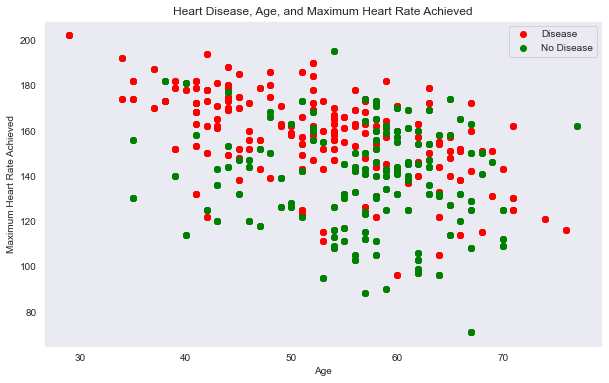

In [16]:
#Melihat hubungan antara penyakit jantung berdasarkan umur dan detak jantung maksimum
red = 'red'
green = 'green'

plt.figure(figsize=(10, 6))

plt.scatter(data.Age[data.Target == 1], data["Maximum Heart Rate Achieved"][data.Target == 1], c=red, label="Disease")
plt.scatter(data.Age[data.Target == 0], data["Maximum Heart Rate Achieved"][data.Target == 0], c=green, label="No Disease")

plt.title("Heart Disease, Age, and Maximum Heart Rate Achieved")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"]) 
plt.ylabel("Maximum Heart Rate Achieved")
plt.show()

Berdasarkan umur, pasien tanpa penyakit jantung rata-rata berada di rentang umur 50 hingga 70 tahun. Selain itu, pasien yang memiliki penyakit jantung rata-rata memiliki detak jantung yang tinggi dibandingkan dengan pasien yang tidak memiliki penyakit jantung

<function matplotlib.pyplot.show(close=None, block=None)>

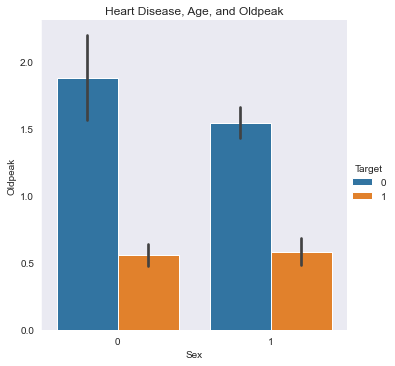

In [17]:
sns.catplot(kind = 'bar', data = data, y ='Oldpeak', x= 'Sex', hue = 'Target')
plt.title("Heart Disease, Age, and Oldpeak")
plt.show

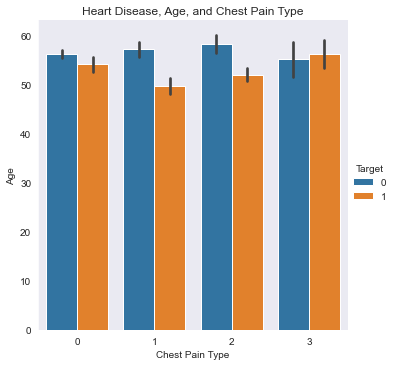

In [18]:
sns.catplot(kind = 'bar', data = data, y ='Age', x= 'Chest Pain Type', hue = 'Target')
plt.title("Heart Disease, Age, and Chest Pain Type")
plt.show()

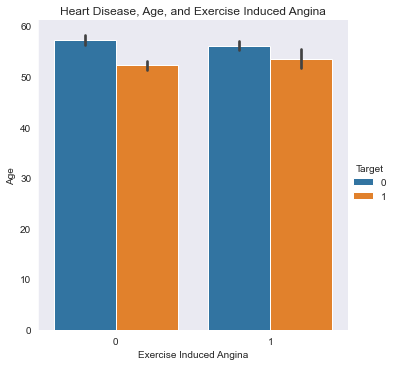

In [19]:
sns.catplot(kind = 'bar', data = data, y ='Age', x= 'Exercise Induced Angina', hue = 'Target')
plt.title("Heart Disease, Age, and Exercise Induced Angina")
plt.show()

# DATA PREPARATION

In [20]:
#Cek Missing Value
data.isna().sum()

Age                                     0
Sex                                     0
Chest Pain Type                         0
Resting Blood Pressure                  0
Serum Cholestoral                       0
Fasting Blood Sugar                     0
Resting Electrocardiographic Results    0
Maximum Heart Rate Achieved             0
Exercise Induced Angina                 0
Oldpeak                                 0
Slope                                   0
Number of Major Vessels                 0
Thalassemia                             0
Target                                  0
dtype: int64

In [21]:
duplicate=data[data.duplicated()]
duplicate

,Age,Sex,Chest Pain Type,Resting Blood Pressure,Serum Cholestoral,Fasting Blood Sugar,Resting Electrocardiographic Results,Maximum Heart Rate Achieved,Exercise Induced Angina,Oldpeak,Slope,Number of Major Vessels,Thalassemia,Target
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
43,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
55,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
61,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [22]:
duplicate[duplicate['Age']==34]

,Age,Sex,Chest Pain Type,Resting Blood Pressure,Serum Cholestoral,Fasting Blood Sugar,Resting Electrocardiographic Results,Maximum Heart Rate Achieved,Exercise Induced Angina,Oldpeak,Slope,Number of Major Vessels,Thalassemia,Target
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
201,34,1,3,118,182,0,0,174,0,0.0,2,0,2,1
572,34,1,3,118,182,0,0,174,0,0.0,2,0,2,1
779,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1


In [23]:
duplicate[duplicate['Age']==50]

,Age,Sex,Chest Pain Type,Resting Blood Pressure,Serum Cholestoral,Fasting Blood Sugar,Resting Electrocardiographic Results,Maximum Heart Rate Achieved,Exercise Induced Angina,Oldpeak,Slope,Number of Major Vessels,Thalassemia,Target
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
133,50,1,2,129,196,0,1,163,0,0.0,2,0,2,1
346,50,1,0,150,243,0,0,128,0,2.6,1,0,3,0
351,50,1,0,144,200,0,0,126,1,0.9,1,0,3,0
615,50,0,2,120,219,0,1,158,0,1.6,1,0,2,1
645,50,1,0,150,243,0,0,128,0,2.6,1,0,3,0
696,50,0,2,120,219,0,1,158,0,1.6,1,0,2,1
735,50,1,2,129,196,0,1,163,0,0.0,2,0,2,1
907,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
909,50,1,0,144,200,0,0,126,1,0.9,1,0,3,0


Sepertinya ada indikasi kesalahan input data sehingga membuat banyak data yang terduplikat

In [24]:
data.shape

(1025, 14)

In [25]:
#Hapus Duplikat Data
data=data.drop_duplicates(keep = 'first')

data.shape

(302, 14)

In [26]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
723    False
733    False
739    False
843    False
878    False
Length: 302, dtype: bool

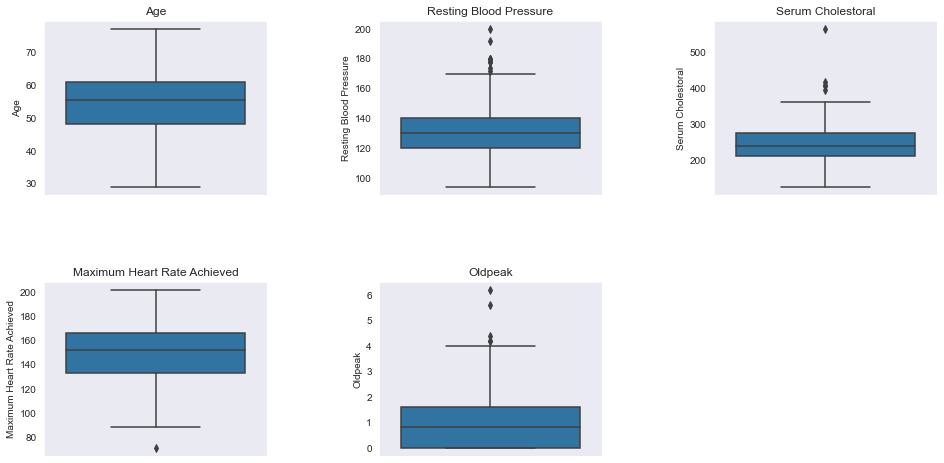

In [27]:
#Cek Outlier
num_col = ['Age', 'Resting Blood Pressure', 'Serum Cholestoral', 'Maximum Heart Rate Achieved', 'Oldpeak']

plt.figure(figsize=(16, 8))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

for index, column in enumerate(num_col):
    plt.subplot(2, 3, index + 1)
    sns.boxplot(data=data, y=column)
    plt.title(column)

plt.show()

Karena outlier nya tergolong sedikit maka akan diatasi dengan melakukan scalling

In [28]:
data

,Age,Sex,Chest Pain Type,Resting Blood Pressure,Serum Cholestoral,Fasting Blood Sugar,Resting Electrocardiographic Results,Maximum Heart Rate Achieved,Exercise Induced Angina,Oldpeak,Slope,Number of Major Vessels,Thalassemia,Target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


# FEATURE ENGINERING

In [29]:
#Mengubah data nominal jadi kategorik
kat = ['Sex', 'Chest Pain Type','Fasting Blood Sugar', 'Resting Electrocardiographic Results','Exercise Induced Angina','Slope','Number of Major Vessels','Thalassemia']
data[kat]=data[kat].astype(object)

C:\Users\AVITA\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age                                   302 non-null    int64  
 1   Sex                                   302 non-null    object 
 2   Chest Pain Type                       302 non-null    object 
 3   Resting Blood Pressure                302 non-null    int64  
 4   Serum Cholestoral                     302 non-null    int64  
 5   Fasting Blood Sugar                   302 non-null    object 
 6   Resting Electrocardiographic Results  302 non-null    object 
 7   Maximum Heart Rate Achieved           302 non-null    int64  
 8   Exercise Induced Angina               302 non-null    object 
 9   Oldpeak                               302 non-null    float64
 10  Slope                                 302 non-null    object 
 11  Number of Major Ves

In [31]:
#Mengubah values data kategorik
data['Sex']=data['Sex'].replace([0,1], ['Female', 'Male'])
data['Exercise Induced Angina']=data['Exercise Induced Angina'].replace([0,1], ['No', 'Yes'])
data['Target']=data['Target'].replace([0,1], ['No Disease', 'Disease'])

C:\Users\AVITA\AppData\Local\Temp/ipykernel_3288/3670957487.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sex']=data['Sex'].replace([0,1], ['Female', 'Male'])
C:\Users\AVITA\AppData\Local\Temp/ipykernel_3288/3670957487.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Exercise Induced Angina']=data['Exercise Induced Angina'].replace([0,1], ['No', 'Yes'])
C:\Users\AVITA\AppData\Local\Temp/ipykernel_3288/3670957487.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

In [32]:
data

,Age,Sex,Chest Pain Type,Resting Blood Pressure,Serum Cholestoral,Fasting Blood Sugar,Resting Electrocardiographic Results,Maximum Heart Rate Achieved,Exercise Induced Angina,Oldpeak,Slope,Number of Major Vessels,Thalassemia,Target
0,52,Male,0,125,212,0,1,168,No,1.0,2,2,3,No Disease
1,53,Male,0,140,203,1,0,155,Yes,3.1,0,0,3,No Disease
2,70,Male,0,145,174,0,1,125,Yes,2.6,0,0,3,No Disease
3,61,Male,0,148,203,0,1,161,No,0.0,2,1,3,No Disease
4,62,Female,0,138,294,1,1,106,No,1.9,1,3,2,No Disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,Female,2,120,211,0,0,115,No,1.5,1,0,2,Disease
733,44,Female,2,108,141,0,1,175,No,0.6,1,0,2,Disease
739,52,Male,0,128,255,0,1,161,Yes,0.0,2,1,3,No Disease
843,59,Male,3,160,273,0,0,125,No,0.0,2,0,2,No Disease


In [33]:
#Memisahkan data Numerik dan Kategorik
num_col =  data.select_dtypes(exclude=np.object_)
cat_col =  data.select_dtypes(exclude=np.number)

In [34]:
#Melakukan standarisasi untuk data Numerik
num_col = (num_col - num_col.mean()) / num_col.std()
num_col

,Age,Resting Blood Pressure,Serum Cholestoral,Maximum Heart Rate Achieved,Oldpeak
0,-0.267522,-0.375932,-0.666622,0.804700,-0.037063
1,-0.157000,0.478117,-0.840523,0.237102,1.771019
2,1.721875,0.762800,-1.400872,-1.072740,1.340523
3,0.727176,0.933609,-0.840523,0.499070,-0.898054
4,0.837698,0.364243,0.917813,-1.902307,0.737829
...,...,...,...,...,...
723,1.500831,-0.660615,-0.685944,-1.509354,0.393433
733,-1.151698,-1.343855,-2.038510,1.110330,-0.381459
739,-0.267522,-0.205123,0.164240,0.499070,-0.898054
843,0.506132,1.616849,0.512043,-1.072740,-0.898054


In [35]:
cat_col.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 878
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Sex                                   302 non-null    object
 1   Chest Pain Type                       302 non-null    object
 2   Fasting Blood Sugar                   302 non-null    object
 3   Resting Electrocardiographic Results  302 non-null    object
 4   Exercise Induced Angina               302 non-null    object
 5   Slope                                 302 non-null    object
 6   Number of Major Vessels               302 non-null    object
 7   Thalassemia                           302 non-null    object
 8   Target                                302 non-null    object
dtypes: object(9)
memory usage: 23.6+ KB


In [36]:
#One-hot encoding untuk data kategorik
cat_col = pd.get_dummies(cat_col)
cat_col

,Sex_Female,Sex_Male,Chest Pain Type_0,Chest Pain Type_1,Chest Pain Type_2,Chest Pain Type_3,Fasting Blood Sugar_0,Fasting Blood Sugar_1,Resting Electrocardiographic Results_0,Resting Electrocardiographic Results_1,...,Number of Major Vessels_1,Number of Major Vessels_2,Number of Major Vessels_3,Number of Major Vessels_4,Thalassemia_0,Thalassemia_1,Thalassemia_2,Thalassemia_3,Target_Disease,Target_No Disease
0,0,1,1,0,0,0,1,0,0,1,...,0,1,0,0,0,0,0,1,0,1
1,0,1,1,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,1
2,0,1,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,1
3,0,1,1,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,1
4,1,0,1,0,0,0,0,1,0,1,...,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,1,0,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,1,0,1,0
733,1,0,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
739,0,1,1,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,1
843,0,1,0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,1,0,0,1


In [37]:
feature = pd.concat([num_col, cat_col], axis =1)

In [38]:
feature

,Age,Resting Blood Pressure,Serum Cholestoral,Maximum Heart Rate Achieved,Oldpeak,Sex_Female,Sex_Male,Chest Pain Type_0,Chest Pain Type_1,Chest Pain Type_2,...,Number of Major Vessels_1,Number of Major Vessels_2,Number of Major Vessels_3,Number of Major Vessels_4,Thalassemia_0,Thalassemia_1,Thalassemia_2,Thalassemia_3,Target_Disease,Target_No Disease
0,-0.267522,-0.375932,-0.666622,0.804700,-0.037063,0,1,1,0,0,...,0,1,0,0,0,0,0,1,0,1
1,-0.157000,0.478117,-0.840523,0.237102,1.771019,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,1
2,1.721875,0.762800,-1.400872,-1.072740,1.340523,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,1
3,0.727176,0.933609,-0.840523,0.499070,-0.898054,0,1,1,0,0,...,1,0,0,0,0,0,0,1,0,1
4,0.837698,0.364243,0.917813,-1.902307,0.737829,1,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,1.500831,-0.660615,-0.685944,-1.509354,0.393433,1,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
733,-1.151698,-1.343855,-2.038510,1.110330,-0.381459,1,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
739,-0.267522,-0.205123,0.164240,0.499070,-0.898054,0,1,1,0,0,...,1,0,0,0,0,0,0,1,0,1
843,0.506132,1.616849,0.512043,-1.072740,-0.898054,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [39]:
feature = feature.drop(columns=['Target_No Disease'])

In [40]:
feature

,Age,Resting Blood Pressure,Serum Cholestoral,Maximum Heart Rate Achieved,Oldpeak,Sex_Female,Sex_Male,Chest Pain Type_0,Chest Pain Type_1,Chest Pain Type_2,...,Number of Major Vessels_0,Number of Major Vessels_1,Number of Major Vessels_2,Number of Major Vessels_3,Number of Major Vessels_4,Thalassemia_0,Thalassemia_1,Thalassemia_2,Thalassemia_3,Target_Disease
0,-0.267522,-0.375932,-0.666622,0.804700,-0.037063,0,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,-0.157000,0.478117,-0.840523,0.237102,1.771019,0,1,1,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1.721875,0.762800,-1.400872,-1.072740,1.340523,0,1,1,0,0,...,1,0,0,0,0,0,0,0,1,0
3,0.727176,0.933609,-0.840523,0.499070,-0.898054,0,1,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0.837698,0.364243,0.917813,-1.902307,0.737829,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,1.500831,-0.660615,-0.685944,-1.509354,0.393433,1,0,0,0,1,...,1,0,0,0,0,0,0,1,0,1
733,-1.151698,-1.343855,-2.038510,1.110330,-0.381459,1,0,0,0,1,...,1,0,0,0,0,0,0,1,0,1
739,-0.267522,-0.205123,0.164240,0.499070,-0.898054,0,1,1,0,0,...,0,1,0,0,0,0,0,0,1,0
843,0.506132,1.616849,0.512043,-1.072740,-0.898054,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0


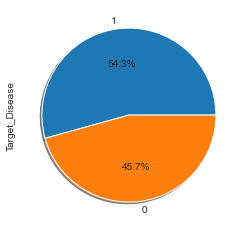

In [41]:
#Melihat perbandingan kolom target
feature['Target_Disease'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
plt.show()

# MEMBANGUN MODEL KLASIFIKASI

In [42]:
X = feature.drop('Target_Disease', axis=1)
y = feature['Target_Disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("X Train : ", len(X_train))
print("y Train : ", len(y_train))
print("X Test : ", len(X_test))
print("y Test : ", len(y_test))

X Train :  211
y Train :  211
X Test :  91
y Test :  91


## Decision Tree dan Random Forest

In [43]:
all_model = [DecisionTreeClassifier,
            RandomForestClassifier]

model_name = [DecisionTreeClassifier,
            RandomForestClassifier]

hasil_train = []
hasil_test = []

for model_type in all_model:
    model = model_type()
    model.fit(X_train,y_train)
    hasil_train.append(model.score(X_train , y_train))
    hasil_test.append(model.score(X_test , y_test))


In [44]:
data_hasil = pd.DataFrame()
data_hasil['model'] = model_name
data_hasil['Accuracy training'] = hasil_train
data_hasil['Accuracy test'] = hasil_test
data_hasil['gap'] = abs(data_hasil['Accuracy training'] - data_hasil['Accuracy test'])
data_hasil.sort_values(by='Accuracy test',ascending=False)

,model,Accuracy training,Accuracy test,gap
1,<class 'sklearn.ensemble._forest.RandomForestC...,1.0,0.835165,0.164835
0,<class 'sklearn.tree._classes.DecisionTreeClas...,1.0,0.736264,0.263736


Hasil akurasi pelatihan dan pengujian dari kedua model yang dibangun menunjukkan adanya indikasi overfitting, dengan perbedaan yang signifikan antara nilai akurasi pelatihan dan pengujian. Untuk mengatasi masalah ini, dapat digunakan teknik cross-validation dalam pembagian data.

Feature: 0, Score: 0.12971
Feature: 1, Score: 0.02308
Feature: 2, Score: 0.03817
Feature: 3, Score: 0.09392
Feature: 4, Score: 0.07997
Feature: 5, Score: 0.02291
Feature: 6, Score: 0.01144
Feature: 7, Score: 0.14230
Feature: 8, Score: 0.01396
Feature: 9, Score: 0.00982
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.01001
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.01847
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.01001
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.09061
Feature: 22, Score: 0.02483
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00408
Feature: 28, Score: 0.27671
Feature: 29, Score: 0.00000


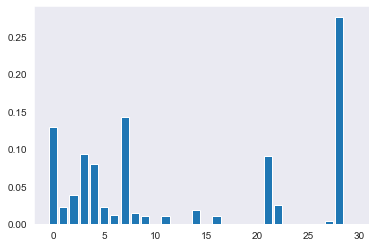

In [60]:
model = DecisionTreeClassifier()
model.fit(X,y)
importance = model.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Feature: 0, Score: 0.07472
Feature: 1, Score: 0.05538
Feature: 2, Score: 0.06788
Feature: 3, Score: 0.09204
Feature: 4, Score: 0.09180
Feature: 5, Score: 0.02134
Feature: 6, Score: 0.02123
Feature: 7, Score: 0.08588
Feature: 8, Score: 0.01092
Feature: 9, Score: 0.02005
Feature: 10, Score: 0.01225
Feature: 11, Score: 0.00620
Feature: 12, Score: 0.00738
Feature: 13, Score: 0.01303
Feature: 14, Score: 0.01260
Feature: 15, Score: 0.00060
Feature: 16, Score: 0.03182
Feature: 17, Score: 0.02877
Feature: 18, Score: 0.00527
Feature: 19, Score: 0.02457
Feature: 20, Score: 0.04210
Feature: 21, Score: 0.07728
Feature: 22, Score: 0.02362
Feature: 23, Score: 0.01191
Feature: 24, Score: 0.00879
Feature: 25, Score: 0.00150
Feature: 26, Score: 0.00100
Feature: 27, Score: 0.00605
Feature: 28, Score: 0.08155
Feature: 29, Score: 0.06247


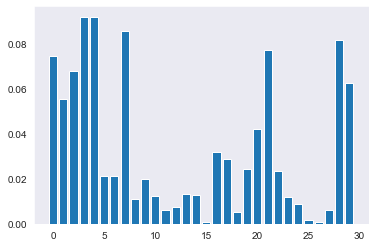

In [61]:
model = RandomForestClassifier()
model.fit(X,y)
importance = model.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

## DECISION TREE

## Cross-Validation

In [45]:
# Inisialisasi model Decision Tree
model1 = DecisionTreeClassifier()

# Inisialisasi StratifiedKFold dengan 5 lipatan
stratified_kfold_DT = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Lakukan cross-validation dengan StratifiedKFold
cv_scores = cross_val_score(model1, X, y, cv=stratified_kfold_DT)

# Tampilkan skor cross-validation untuk setiap lipatan
print("Cross-Validation Scores:", cv_scores)

# Hitung rata-rata skor cross-validation
avg_score = cv_scores.mean()
print("Average Accuracy:", avg_score)

Cross-Validation Scores: [0.63934426 0.75409836 0.7        0.78333333 0.75      ]
Average Accuracy: 0.7253551912568306


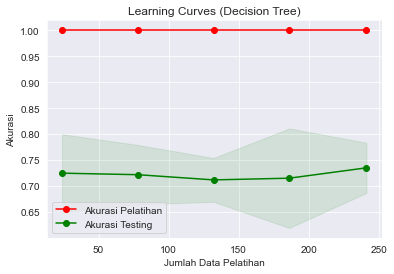

In [65]:
# Fungsi untuk membuat learning curve
def plot_learning_curve(estimator, title, X, y, cv, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Jumlah Data Pelatihan")
    plt.ylabel("Akurasi")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes, scoring="accuracy")
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Akurasi Pelatihan")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Akurasi Testing")
    
    plt.legend(loc="best")
    return plt

# Contoh penggunaan plot_learning_curve
title = "Learning Curves (Decision Tree)"
plot_learning_curve(model1, title, X, y, cv=stratified_kfold_DT)

plt.show()

## Hyperparameter Tuning

In [46]:
# Menentukan parameter yang ingin dioptimalkan dan jangkauan nilai-nilainya
param_grid_DT = {
    'criterion': ['gini', 'entropy'],  # Kriteria pemisahan (criterion)
    'max_depth': [None, 10, 20, 30],  # Kedalaman maksimum pohon
    'min_samples_split': [2, 5, 10]  # Jumlah sampel minimum untuk membagi node
}

# Inisialisasi GridSearchCV dengan model, parameter grid, dan StratifiedKFold
grid_search_DT = GridSearchCV(model1, param_grid_DT, cv=stratified_kfold_DT, scoring='accuracy')

# Lakukan pencarian parameter terbaik
grid_search_DT.fit(X, y)

# Menampilkan parameter terbaik dan skor terbaik
print("Best Parameters:", grid_search_DT.best_params_)
print("Best Score:", grid_search_DT.best_score_)

Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2}
Best Score: 0.7450819672131146


In [47]:
# Prediksi menggunakan model Decision Tree dengan hyperparameter terbaik
hyper_pred = grid_search_DT.predict(X_test)

# Hitung confusion matrix
confusion_mat_DT = confusion_matrix(y_test, hyper_pred)

# Tampilkan confusion matrix
print("Confusion Matrix:")
print(confusion_mat_DT)

# Tampilkan classification report
print("Classification Report:")
print(classification_report(y_test, hyper_pred))

Confusion Matrix:
[[48  0]
 [ 0 43]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        43

    accuracy                           1.00        91
   macro avg       1.00      1.00      1.00        91
weighted avg       1.00      1.00      1.00        91



In [48]:
print('Accuracy of Decision Tree train data: {:.3f}'.format(grid_search_DT.score(X_train, y_train)))
print('Accuracy of Decision Tree test data: {:.3f}'.format(grid_search_DT.score(X_test, y_test)))

Accuracy of Decision Tree train data: 1.000
Accuracy of Decision Tree test data: 1.000


In [49]:
#Melakukan Prediksi 
hyper_pred = grid_search_DT.predict(X_test)
DT_test = pd.merge(X_test, y_test, left_index=True, right_index=True, how='outer')
DT_test['prediction'] = hyper_pred
DT_test

,Age,Resting Blood Pressure,Serum Cholestoral,Maximum Heart Rate Achieved,Oldpeak,Sex_Female,Sex_Male,Chest Pain Type_0,Chest Pain Type_1,Chest Pain Type_2,...,Number of Major Vessels_1,Number of Major Vessels_2,Number of Major Vessels_3,Number of Major Vessels_4,Thalassemia_0,Thalassemia_1,Thalassemia_2,Thalassemia_3,Target_Disease,prediction
245,-1.151698,-0.091249,-0.531365,1.677928,-0.898054,0,1,0,1,0,...,0,0,0,0,0,0,1,0,1,1
349,0.837698,-0.091249,0.318819,-2.295259,0.135136,1,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
135,0.395610,2.186215,-0.415431,-0.155851,1.512721,1,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
389,0.948220,0.762800,-0.260852,0.018795,1.082226,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,1
66,-0.157000,-0.091249,-0.956457,0.106117,0.135136,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,-1.372742,-1.685474,0.357464,-1.203724,-0.381459,1,0,1,0,0,...,0,0,0,0,0,0,1,0,1,1
20,0.616654,0.478117,-1.188326,0.237102,1.684920,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
177,1.058743,-0.660615,-0.009661,-2.338921,0.996127,0,1,1,0,0,...,1,0,0,0,0,0,1,0,0,0
90,-0.046478,-1.343855,0.396109,0.761038,-0.898054,1,0,0,0,1,...,0,0,0,0,0,0,1,0,1,1


## RANDOM FOREST

## Cross-Validation

In [50]:
# Inisialisasi model Random Forest
model2 = RandomForestClassifier()

# Inisialisasi StratifiedKFold dengan 5 lipatan
stratified_kfold_RF = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Lakukan cross-validation dengan StratifiedKFold
cv_scoress = cross_val_score(model2, X, y, cv=stratified_kfold_RF)

# Tampilkan skor cross-validation untuk setiap lipatan
print("Cross-Validation Scores:", cv_scoress)

# Hitung rata-rata skor cross-validation
avg_score = cv_scoress.mean()
print("Average Accuracy:", avg_score)

Cross-Validation Scores: [0.78688525 0.81967213 0.81666667 0.86666667 0.83333333]
Average Accuracy: 0.8246448087431695


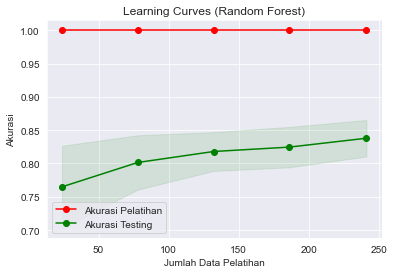

In [66]:
# Fungsi untuk membuat learning curve
def plot_learning_curve(estimator, title, X, y, cv, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Jumlah Data Pelatihan")
    plt.ylabel("Akurasi")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes, scoring="accuracy")
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Akurasi Pelatihan")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Akurasi Testing")
    
    plt.legend(loc="best")
    return plt

# Contoh penggunaan plot_learning_curve
title = "Learning Curves (Random Forest)"
plot_learning_curve(model2, title, X, y, cv=stratified_kfold_RF)

plt.show()

## Hyperparameter Tuning

In [53]:
# Menentukan parameter yang ingin dioptimalkan dan jangkauan nilai-nilainya
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Inisialisasi GridSearchCV dengan model, parameter grid, dan validasi silang
grid_search_RF = GridSearchCV(model2, param_grid, cv=stratified_kfold_RF, scoring='accuracy')

# Lakukan pencarian parameter terbaik
grid_search_RF.fit(X, y)

# Menampilkan parameter terbaik dan skor terbaik
print("Best Parameters:", grid_search_RF.best_params_)
print("Best Score:", grid_search_RF.best_score_)


Best Parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 300}
Best Score: 0.8444808743169399


In [54]:
# Prediksi menggunakan model Decision Tree dengan hyperparameter terbaik
hyperr_pred = grid_search_RF.predict(X_test)

# Hitung confusion matrix
confusion_mat_RF = confusion_matrix(y_test, hyperr_pred)

# Tampilkan confusion matrix
print("Confusion Matrix:")
print(confusion_mat_RF)

# Tampilkan classification report
print("Classification Report:")
print(classification_report(y_test, hyperr_pred))

Confusion Matrix:
[[43  5]
 [ 1 42]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.90      0.93        48
           1       0.89      0.98      0.93        43

    accuracy                           0.93        91
   macro avg       0.94      0.94      0.93        91
weighted avg       0.94      0.93      0.93        91



In [55]:
print('Accuracy of Random Forest train data: {:.3f}'.format(grid_search_RF.score(X_train, y_train)))
print('Accuracy of Random Forest test data: {:.3f}'.format(grid_search_RF.score(X_test, y_test)))

Accuracy of Random Forest train data: 0.943
Accuracy of Random Forest test data: 0.934


In [63]:
#Melakukan Prediksi 
hyperr_pred = grid_search_RF.predict(X_test)
RF_test = pd.merge(X_test, y_test, left_index=True, right_index=True, how='outer')
RF_test['prediction'] = hyperr_pred
RF_test

,Age,Resting Blood Pressure,Serum Cholestoral,Maximum Heart Rate Achieved,Oldpeak,Sex_Female,Sex_Male,Chest Pain Type_0,Chest Pain Type_1,Chest Pain Type_2,...,Number of Major Vessels_1,Number of Major Vessels_2,Number of Major Vessels_3,Number of Major Vessels_4,Thalassemia_0,Thalassemia_1,Thalassemia_2,Thalassemia_3,Target_Disease,prediction
245,-1.151698,-0.091249,-0.531365,1.677928,-0.898054,0,1,0,1,0,...,0,0,0,0,0,0,1,0,1,1
349,0.837698,-0.091249,0.318819,-2.295259,0.135136,1,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
135,0.395610,2.186215,-0.415431,-0.155851,1.512721,1,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
389,0.948220,0.762800,-0.260852,0.018795,1.082226,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,1
66,-0.157000,-0.091249,-0.956457,0.106117,0.135136,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,-1.372742,-1.685474,0.357464,-1.203724,-0.381459,1,0,1,0,0,...,0,0,0,0,0,0,1,0,1,1
20,0.616654,0.478117,-1.188326,0.237102,1.684920,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
177,1.058743,-0.660615,-0.009661,-2.338921,0.996127,0,1,1,0,0,...,1,0,0,0,0,0,1,0,0,0
90,-0.046478,-1.343855,0.396109,0.761038,-0.898054,1,0,0,0,1,...,0,0,0,0,0,0,1,0,1,1
